In [1]:
# Import standard libraries
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
import scipy.stats as ss
import csv
import pandas as pd
import networkx as nx
import community
import pickle
from collections import defaultdict
import operator
from scipy.sparse import csr_matrix
import itertools
import os.path
import math
import pybedtools
import time
from tqdm import tqdm
import random
import gseapy
from gseapy.plot import barplot, dotplot

# Custom libraries
import prelim_analysis_utils as pa

# Data directories

In [2]:
# Directory for storing preliminary results
prelim_results_dir = '/home/louiscam/projects/gpcr/save/prelim_results_dir/'

In [3]:
# Specify directories and relevant information
cell_type = 'IMR90'
resol_str = '250kb'
resol = 250000
quality = 'MAPQGE30'

# Load gene list to analyze

In [4]:
# Load adhesome gene pairs with highest Hi-C contact values as pickle
top_adhesome_gene_pairs = pickle.load(open(prelim_results_dir+'top_adhesome_gene_pairs.pkl', 'rb'))
top_adhesome_gene_pairs.head()

,column,index,hic_contact
9515,LPP,PTK2,17.902131
9482,LPP,PALLD,17.630129
10028,PALLD,PTK2,16.536330
10992,PDE4D,TIAM1,16.184708
10910,PDE4D,PTPRO,15.752584


In [5]:
# Gene appearance in top Hi-C pairs
top_genes = np.concatenate([top_adhesome_gene_pairs['column'],top_adhesome_gene_pairs['index']])
values, counts = np.unique(top_genes, return_counts=True)
top_genes_df = pd.DataFrame({'gene': values, 'count': counts}).sort_values(by='count', ascending=False)
top_genes_df=top_genes_df[top_genes_df['count']>40]

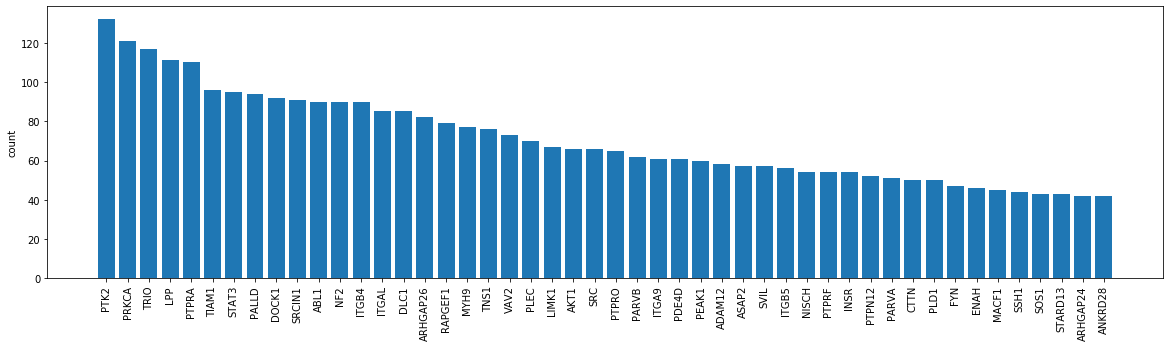

In [6]:
# Plot gene counts in top Hi-C genes
plt.figure(figsize=(20,5))
plt.bar(x=top_genes_df['gene'], height=top_genes_df['count'])
plt.xticks(rotation='vertical')
plt.ylabel('count')
plt.show()

# Run GSEA

Resources:
- https://gseapy.readthedocs.io/en/latest/introduction.html
- https://gseapy.readthedocs.io/en/latest/run.html
- https://maayanlab.cloud/Enrichr/#stats
- https://www.coursera.org/lecture/network-biology/enrichment-analysis-and-enrichr-3FDgJ

In [8]:
# List of genes
unique_top_genes = list(np.unique(np.concatenate([top_adhesome_gene_pairs['column'],top_adhesome_gene_pairs['index']])))
print(len(unique_top_genes))

198


## GO_Biological_Process_2018

In [10]:
 # Run GSEA
enr = gseapy.enrichr(gene_list=unique_top_genes, gene_sets='GO_Biological_Process_2018', organism='Human',
                     description='top_adhesome_hic', outdir='gsea_top_hic',format='png',
                     verbose=False)
print(len(enr.results))

1902


In [93]:
# Visualize results
enr.results.head(2)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2018,cell-matrix adhesion (GO:0007160),30/90,3.064789e-38,5.829229e-35,0,0,58.755952,5075.236622,ITGB1;ITGB5;ITGB4;ITGB3;ITGB2;ILK;THY1;ITGAL;P...
1,GO_Biological_Process_2018,integrin-mediated signaling pathway (GO:0007229),25/58,2.142987e-35,2.037981e-32,0,0,86.569452,6910.690207,ITGB1;NRP1;ITGB5;SRC;ITGB3;ITGB2;ILK;NEDD9;THY...


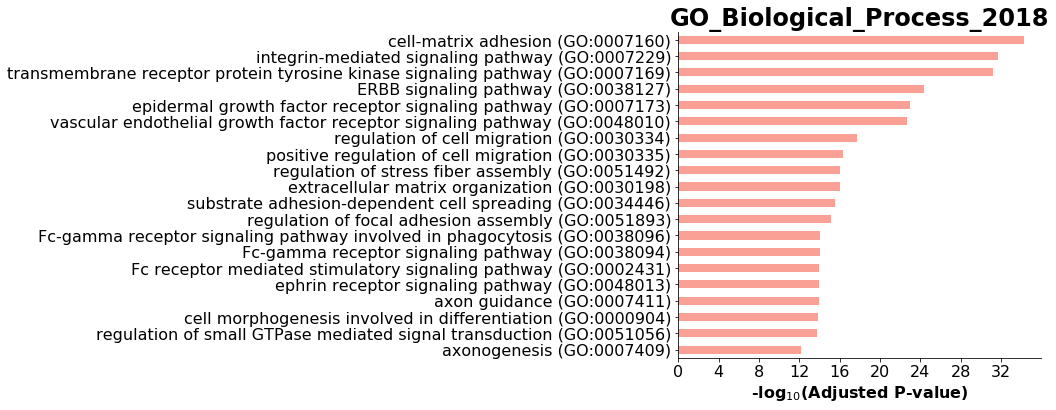

In [94]:
# Barplot
barplot(enr.res2d, column='Adjusted P-value', title='GO_Biological_Process_2018',
        cutoff=0.05, top_term=20, figsize=(6.5, 6), color='salmon', ofname=None)

## PPI_Hub_Proteins

In [95]:
 # Run GSEA
enr = gseapy.enrichr(gene_list=unique_top_genes, gene_sets='PPI_Hub_Proteins', organism='Human',
                     description='top_adhesome_hic', outdir='gsea_top_hic',format='png',
                     verbose=False)
print(len(enr.results))

269


In [133]:
# Visualize results
enr.results.head(20)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,PPI_Hub_Proteins,PTK2,53/163,3.881848e-67,1.044217e-64,0,0,65.434232,10005.999246,ITGB1;TRIO;ITGB5;ITGB4;ITGB3;ITGB2;PTEN;CIB1;P...
1,PPI_Hub_Proteins,SRC,68/513,4.751342e-58,6.390556e-56,0,0,22.753258,3003.236896,ITGB1;ITGB5;ITGB4;ITGB3;INPPL1;ARHGAP5;PKD1;CA...
2,PPI_Hub_Proteins,INSR,43/202,2.611190e-45,2.341367e-43,0,0,34.272631,3518.309173,GRB7;ARF1;SHC1;SRC;INPPL1;ARHGAP5;CBL;PVR;LPP;...
3,PPI_Hub_Proteins,SHC1,40/195,2.000029e-41,1.345020e-39,0,0,32.089833,3007.228929,ITGB1;GRB7;LRP1;SHC1;ITGB4;SRC;ITGB3;ITGB2;INP...
4,PPI_Hub_Proteins,ITGB1,33/129,1.158657e-37,6.233576e-36,0,0,41.054167,3491.590643,ITGB1;CD151;ITGB5;SHC1;SRC;PXN;FHL2;ILK;TENC1;...
5,PPI_Hub_Proteins,LCK,35/196,5.283433e-34,2.368739e-32,0,0,26.194985,2007.146669,SHC1;SRC;PXN;INPPL1;PTEN;NEDD9;THY1;PTPRH;CBL;...
6,PPI_Hub_Proteins,EGFR,46/467,1.057695e-32,4.064570e-31,0,0,13.931835,1025.754094,BCAR3;GRB7;SHC1;SRC;ITGB4;PXN;INPPL1;FHL2;HSPB...
7,PPI_Hub_Proteins,GRB2,54/767,4.706877e-31,1.517868e-29,0,0,10.039797,701.090176,ITGB4;INPPL1;HSPB1;TUBA1B;CFL1;HRAS;VAV3;SYK;A...
8,PPI_Hub_Proteins,PIK3R1,38/301,5.078369e-31,1.517868e-29,0,0,17.644534,1230.797093,SHC1;SRC;PXN;INPPL1;AGAP2;ASAP2;CBL;TUBA1B;MAP...
9,PPI_Hub_Proteins,PRKCA,47/547,9.782799e-31,2.631573e-29,0,0,12.015815,830.286926,ITGB1;LRP1;SDC4;ITGB5;SHC1;SRC;ITGB4;ITGB3;ITG...


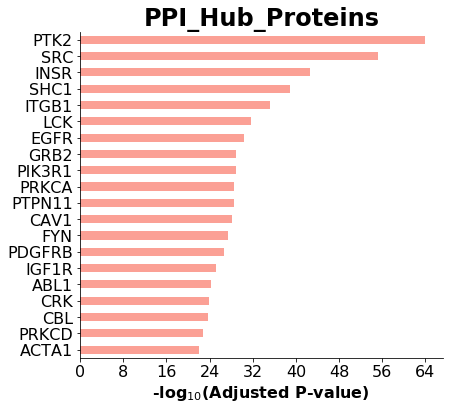

In [98]:
# Barplot
barplot(enr.res2d, column='Adjusted P-value', title='PPI_Hub_Proteins',
        cutoff=0.05, top_term=20, figsize=(6.5, 6), color='salmon', ofname=None)